<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/DiabetesDataANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
y=df['Outcome']
X=np.array(df.drop('Outcome',axis=1))

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

def create_model(trial):
  num_neurons_1 = trial.suggest_int("num_neurons_1", 64, 256, step=32)
  num_neurons_2 = trial.suggest_int("num_neurons_2", 32, 128, step=32)
  dropout_rate_1 = trial.suggest_float("dropout_rate_1", 0.1, 0.5, step=0.1)
  dropout_rate_2 = trial.suggest_float("dropout_rate_2", 0.1, 0.5, step=0.1)
  learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

  model = Sequential([
        Dense(num_neurons_1, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate_1),
        Dense(num_neurons_2, activation='relu'),
        Dropout(dropout_rate_2),
        Dense(1, activation='sigmoid')
    ])

  optimizer=Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [8]:
def obj(trail):
  model=create_model(trail)

  history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50, batch_size=16, verbose=0
    )
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  return accuracy

In [11]:
import optuna
study=optuna.create_study(direction='maximize')
study.optimize(obj,n_trials=10)

[I 2025-03-07 03:49:35,233] A new study created in memory with name: no-name-1b69a8f7-d3b6-475b-9bf1-c699bc541f12
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-03-07 03:49:57,986] Trial 0 finished with value: 0.7207792401313782 and parameters: {'num_neurons_1': 64, 'num_neurons_2': 96, 'dropout_rate_1': 0.1, 'dropout_rate_2': 0.2, 'learning_rate': 0.0010879479341177538}. Best is trial 0 with value: 0.7207792401313782.
[I 2025-03-07 03:50:14,901] Trial 1 finished with value: 0.7142857313156128 and parameters: {'num_neurons_1': 256, 'num_neurons_2': 128, 'dropout_rate_1': 0.2, 'dropout_rate_2': 0.2, 'learning_rate': 0.002760283694013938}. Best is trial 0 with value: 0.7207792401313782.
[I 2025-03-07 

In [15]:
# best_params = study.best_params_
best_model = create_model(study.best_trial)
best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6346 - loss: 0.6747 - val_accuracy: 0.7013 - val_loss: 0.6363
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6857 - loss: 0.6359 - val_accuracy: 0.7273 - val_loss: 0.6013
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.6005 - val_accuracy: 0.7468 - val_loss: 0.5767
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7453 - loss: 0.5671 - val_accuracy: 0.7403 - val_loss: 0.5589
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 0.5344 - val_accuracy: 0.7532 - val_loss: 0.5425
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7235 - loss: 0.5350 - val_accuracy: 0.7532 - val_loss: 0.5302
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 0.5039 - val_accuracy: 0.7532 - val_loss: 0.5219
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.4910 - val_accuracy: 0.7532 - 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[81 18]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



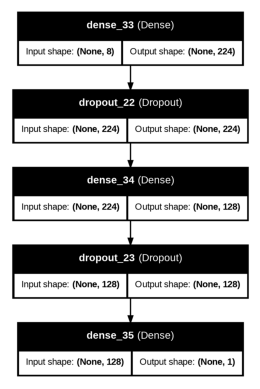

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()